# QuickStart

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
# Download training data from the open datasets
training_data = datasets.FashionMNIST(
    root='data',
    train = True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train= False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [16]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]:  {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [17]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [18]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [20]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [21]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [22]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.309230  [   64/60000]
loss: 2.298622  [ 6464/60000]
loss: 2.281975  [12864/60000]
loss: 2.274302  [19264/60000]
loss: 2.262661  [25664/60000]
loss: 2.222073  [32064/60000]
loss: 2.232169  [38464/60000]
loss: 2.196241  [44864/60000]
loss: 2.185888  [51264/60000]
loss: 2.154585  [57664/60000]
Test Error: 
 Accuracy: 35.9%, Avg loss: 2.153669 

Epoch 2
-------------------------------
loss: 2.162763  [   64/60000]
loss: 2.159248  [ 6464/60000]
loss: 2.100536  [12864/60000]
loss: 2.115034  [19264/60000]
loss: 2.077618  [25664/60000]
loss: 2.000604  [32064/60000]
loss: 2.035298  [38464/60000]
loss: 1.951664  [44864/60000]
loss: 1.951069  [51264/60000]
loss: 1.882192  [57664/60000]
Test Error: 
 Accuracy: 58.8%, Avg loss: 1.884238 

Epoch 3
-------------------------------
loss: 1.915032  [   64/60000]
loss: 1.893007  [ 6464/60000]
loss: 1.774770  [12864/60000]
loss: 1.812678  [19264/60000]
loss: 1.717377  [25664/60000]
loss: 1.654327  [32064/600

In [23]:
torch.save(model.state_dict(), '/Users/stevenyu/personal_projects/machine_learning_study/experiments/model.pth')
print("Saved PyTorch Model State")

Saved PyTorch Model State


In [24]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("/Users/stevenyu/personal_projects/machine_learning_study/experiments/model.pth", weights_only=True))

<All keys matched successfully>

In [25]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


# Tensors

- Tensors are specialized data structures similar to arrays and matrices.
- PyTorch uses tensors to encode the inputs and outputs of a model as well as the model's parameters.
- Tensors are similar to Numpy's ndarrays, but tensors can run on GPUs. 


### Different ways to initialize a tensor

In [26]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [ ]:
import numpy as np


In [28]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [29]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5526, 0.0444],
        [0.5763, 0.8350]]) 



In [30]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.0397, 0.9881, 0.7501],
        [0.9913, 0.3174, 0.0983]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Tensor Attributes

In [31]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [32]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [33]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [34]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

#### Single-element tensors
- If you have a one-element tensor you can convert it to a Python numerical value using item().

In [35]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [36]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


# Datasets & DataLoaders

- PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allows for pre-loaded datasets and your own data.
- Dataset: stores the samples and their corresponding labels
- DataLoader: wraps an iterable around the Dataset to enable easy access to the samples

### Loading a Dataset

In [37]:
'''
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
'''

'\nimport torch\nfrom torch.utils.data import Dataset\nfrom torchvision import datasets\nfrom torchvision.transforms import ToTensor\nimport matplotlib.pyplot as plt\n\n\ntraining_data = datasets.FashionMNIST(\n    root="data",\n    train=True,\n    download=True,\n    transform=ToTensor()\n)\n\ntest_data = datasets.FashionMNIST(\n    root="data",\n    train=False,\n    download=True,\n    transform=ToTensor()\n)\n'

- root : The path where the train/test data is stored
- train : Specifies training or test dataset
- download : Downloads the data from the internet if it's not available at root
- transform & target_transform : Specifies the feature and label transformations

### Creating a Custom Dataset for your files

- A custom Dataset class must implement three functions: __init__, __len__, and __getitem__. 

In [40]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### __init__
- The __init__ function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms 

### __len__
- Returns the numbe of samples in our dataset.

### __getitem__
- The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

## Preparing data for training with DataLoaders


In [42]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


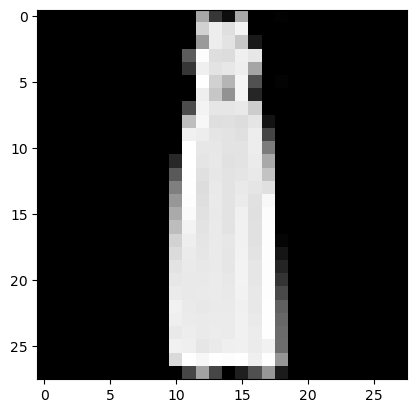

Label: 3


In [43]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Transforms

- Data does not always come in the format required for training. 
- We use __transform__ to perform some manipulation of the date to make it more suitable for training. 

In [44]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### ToTensor()
- Converts a PIL image or Numpy ndarray into a FloatTensor and scales the image's pixel intensity values in the range [0., 1.]

### Lambda Transform
- Apply any user-defined lambda function.

## Build the Neural Network

### Define the Class

To define a neural network we subclass nn.Module, and initialize the neural network layers in __init__. Every nn.Module subclass implements the operations on input data in the forward method.

In [50]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [51]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [57]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logitis = self.linear_relu_stack(x)
        return logitis

In [58]:
# Create an instance of NeuralNetwork, and move it to the device, and print its structure
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [59]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5])


### Model Layer

In [61]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [62]:
# nn.Flatten layer converts each 2D 28x28 image to a contiguous array of 784 pixel values.

flatten = nn.Flatten()
flate_image = flatten(input_image)
print(flate_image.size())

torch.Size([3, 784])


In [64]:
# The linear layer is a module that applies a linear transformation on the input using its stored weights and biases

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flate_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLu (a type of non-linear activation function)
- The non-linear activations are what create the complex mappings between the model's inputs and outputs.
- They are applied after linear transformations to introduce nonlinearlity. 

In [65]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.3809, -0.4591, -0.2012, -0.0889,  0.0208,  0.6275, -0.6029,  0.0941,
         -0.5884,  0.7760, -0.3774, -0.3122, -0.2136,  0.1389,  0.2838, -0.0772,
         -0.1289,  0.2597, -0.1792, -0.2953],
        [-0.2087, -0.4531, -0.1286,  0.1053, -0.0609,  0.7591, -0.3363,  0.0673,
         -0.3959,  0.5053, -0.1523, -0.4117, -0.2573,  0.2128,  0.2217, -0.0750,
         -0.4974,  0.2608,  0.0301, -0.2678],
        [ 0.0622, -0.3622,  0.2625, -0.0342, -0.2117,  0.4093, -0.7744,  0.3127,
         -0.5080,  0.2088, -0.3570, -0.2558, -0.6534,  0.2453,  0.3145, -0.1349,
         -0.6084, -0.1633, -0.1698, -0.0237]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0208, 0.6275, 0.0000, 0.0941, 0.0000,
         0.7760, 0.0000, 0.0000, 0.0000, 0.1389, 0.2838, 0.0000, 0.0000, 0.2597,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.1053, 0.0000, 0.7591, 0.0000, 0.0673, 0.0000,
         0.5053, 0.0000, 0.0000, 0.0000, 0.2128, 0.22

### nn.Sequential
- An ordered container of modules. 
- The data is passed through all the modules in the same order as defined. 

In [66]:
seq_modules = nn.Sequential(
    flatten, 
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

### nn.Softmax
- The last linear layer of the neural network return logits - raw values in [-inf, inf].
- The Softmax function takes this output from the last linear layer and scale the value to [0,1] representing the models's predicted probabilites for each class. 
- dim parameter indicates the dimension along which the values must sum to 1.

In [67]:
softmax = nn.Softmax(dim = 1)
pred_probab = softmax(logits)

### Model Parameters
- Many layers inside a neural network are parameterized. (Have associated weights and biases)


In [68]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0315,  0.0264,  0.0074,  ..., -0.0206,  0.0258, -0.0332],
        [ 0.0039, -0.0018, -0.0003,  ..., -0.0356,  0.0011, -0.0187]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0130,  0.0163], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0044,  0.0199, -0.0252,  ...,  0.0302,  0.0240,  0.0369],
        [ 0.0376,  0.0113,  0.0169,  ..., -0.0179, -0.0099,  0.0024]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

# Automatic Differentiation with torch.autograd

- The most frequently used algorithm is back propagation where the parameters (model weights) are adjusted according to the gradient of the loss function.
- PyTorch has a built-in differentiation engin called torch.autograd which supports automatic computation of gradient for any computational graph.

In [ ]:
# Simple one layer neural network

x = torch.ones(5) # input tensor
y = torch.zeros(3) # expected output
w = torch.randn(5, 3, requires_grad= True) # weight (One of the parameters that needs to be optimized so requires_grad is set to True)
b = torch.randn(3, requires_grad = True)  # Bias (Another parameter that needs to be optimized)
z = torch.matmul(x,w) + b # output
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y) #loss function

### Computing Gradients

- To optimize weights for parameters i a neural network, we need to compute the derivatives of our loss function with respect to parameters. 
- To compute those derivatives we call loss.backward(), then retrieve the values from w.grad and b.grad.

In [70]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0475, 0.3162, 0.2015],
        [0.0475, 0.3162, 0.2015],
        [0.0475, 0.3162, 0.2015],
        [0.0475, 0.3162, 0.2015],
        [0.0475, 0.3162, 0.2015]])
tensor([0.0475, 0.3162, 0.2015])


### Disabling Gradient Tracking
- There are times in which we do not want to track the gradient and all tensors with the requires_grad is defaulted to True. Times can be if the model is already trained and want to just do forward computation. 
- One way to disable gradient tracking is surounding computation code with torch.no_grad() block or using the detach() method

- Some reasons to not track gradient is setting some parameters as frozen parameters and also speed up computation when you are doing only forward pass. 

In [71]:
# torch.no_grad() block

z = torch.matmul(x, w)+b #Gradient tracked
print(z.requires_grad)

with torch.no_grad(): #Gradient not tracked
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Autograd keeps a record of data (tensors) and executed operations (along with the resulting new tensors) in a directed acyclic graph consisting of Function objects. Where the leaves are the input tensors and the roots are the output tensors. 


## Optimizing Model Parameters


In [72]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

### Hyperparameters
- Hyperparameters are adjustable parameters that let you control the model optimization process. 

#### Examples of some Hyperparameters
- Number of Epochs - the number of times to iterate over the dataset
- Batch Size - The number of data samples propagated through the network before the parameters are updated
- Learning Rate - How much to update the models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [73]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

### Optimization Loop
- Each iteration of the optimization loop is called an epoch

#### Epochs consists of two main parts:
- __Train Loop__ : Iterate over the training dataset and try to converge to optimal parameters.
- __Validation/Test Loop__ : Iterate over the test dataset to check if model performance is improving.

### Loss Function
- The loss function is used to measure the difference between the result and the target value.
- The loss function is also the function that we want ot minimize during training.
- Some common loss functions are nn.MSELoss (Mean Square Error) for regression tast, nn.NLLLoss (Negative Log Likelihood) for classification nn.CrossEntropyLoss combines nn.LogSoftmax and NLLoss.

In [74]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### Optimizer
- Optimization is adjusting model parameters to reduce the model error in accordance to the loss function. 

#### Optimization Steps:
- Call optimizer.zero_grad() to reset the gradients of model paramters. 
- Backpropagate the prediction loss with a call to loss.backward(). 
- Once we have our gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass

In [75]:
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

In [76]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [77]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.293339  [   64/60000]
loss: 2.288450  [ 6464/60000]
loss: 2.265943  [12864/60000]
loss: 2.268883  [19264/60000]
loss: 2.239414  [25664/60000]
loss: 2.211805  [32064/60000]
loss: 2.224590  [38464/60000]
loss: 2.190962  [44864/60000]
loss: 2.187872  [51264/60000]
loss: 2.160578  [57664/60000]
Test Error: 
 Accuracy: 43.6%, Avg loss: 2.152150 

Epoch 2
-------------------------------
loss: 2.160277  [   64/60000]
loss: 2.152103  [ 6464/60000]
loss: 2.090964  [12864/60000]
loss: 2.110544  [19264/60000]
loss: 2.050568  [25664/60000]
loss: 1.994986  [32064/60000]
loss: 2.026690  [38464/60000]
loss: 1.951298  [44864/60000]
loss: 1.958513  [51264/60000]
loss: 1.880218  [57664/60000]
Test Error: 
 Accuracy: 58.1%, Avg loss: 1.881582 

Epoch 3
-------------------------------
loss: 1.918228  [   64/60000]
loss: 1.886666  [ 6464/60000]
loss: 1.767148  [12864/60000]
loss: 1.804835  [19264/60000]
loss: 1.690070  [25664/60000]
loss: 1.646776  [32064/600

## Save and Load the Model

#### Saving and Loading Model Weights
- PyTorch models store the learned parameters in an internal state dictionary, called state_dict. 

In [81]:

import torch
import torchvision.models as models
'''
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')
'''

"\nmodel = models.vgg16(weights='IMAGENET1K_V1')\ntorch.save(model.state_dict(), 'model_weights.pth')\n"

In [82]:
model = models.vgg16
model.load_state_dict(torch.load('model_weights.pth', weights_only=True))
model.eval()

AttributeError: 'function' object has no attribute 'load_state_dict'

### Saving and Loading Models with Shapes

In [83]:
torch.save(model, 'model.pth')